# TASK #1: UNDERSTAND THE PROBLEM AND BUSINESS CASE

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [5]:
# install nltk
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
# install gensim
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
import PyPDF2
import os

In [8]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# load the data
resume_df = pd.read_csv(r'C:\Users\Yatharth Kohli\OneDrive\Documents\Data Science lab\datasets\resume_dataset\Resume\Resume.csv')
resume_df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [5]:
resume_df


ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface vmargins hmargin...        HR  
2     <div class="fontsize fontface vmargins hmargin...        HR  
3     <div class="fontsize fontface vmargins hmargin...        HR  
4     <div class="fontsize fontface vmargins hmargin...        HR  
...                                                 ...       ...  
2479  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2480  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2481  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2482  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2483  <div class="fontsize fontface vmargins hmargin...  AVIATION  

[2484 rows x 4 columns]

In [7]:
# data containing resume
resume_df=resume_df[['Resume_str','Category']]
resume_df

Resume_str  Category
0              HR ADMINISTRATOR/MARKETING ASSOCIATE\...        HR
1              HR SPECIALIST, US HR OPERATIONS      ...        HR
2              HR DIRECTOR       Summary      Over 2...        HR
3              HR SPECIALIST       Summary    Dedica...        HR
4              HR MANAGER         Skill Highlights  ...        HR
...                                                 ...       ...
2479           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...  AVIATION
2480           GOVERNMENT RELATIONS, COMMUNICATIONS ...  AVIATION
2481           GEEK SQUAD AGENT         Professional...  AVIATION
2482           PROGRAM DIRECTOR / OFFICE MANAGER    ...  AVIATION
2483           STOREKEEPER II       Professional Sum...  AVIATION

[2484 rows x 2 columns]

MINI CHALLENGE #1: 
- Print the first and last elements in the dataframe. 

In [13]:
resume_df.head(10)


Resume_str Category
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR
1           HR SPECIALIST, US HR OPERATIONS      ...       HR
2           HR DIRECTOR       Summary      Over 2...       HR
3           HR SPECIALIST       Summary    Dedica...       HR
4           HR MANAGER         Skill Highlights  ...       HR
5           HR GENERALIST       Summary     Dedic...       HR
6           HR MANAGER       Summary    HUMAN RES...       HR
7           HR MANAGER         Professional Summa...       HR
8           HR SPECIALIST       Summary    Posses...       HR
9           HR CLERK       Summary    Translates ...       HR

In [9]:
resume_df.tail(1)

Resume_str  Category
2483           STOREKEEPER II       Professional Sum...  AVIATION

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [11]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [13]:
# check for null values
resume_df.isnull().sum()

Resume_str    0
Category      0
dtype: int64

In [15]:
resume_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [17]:
resume_df.head()

Resume_str Category
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR
1           HR SPECIALIST, US HR OPERATIONS      ...       HR
2           HR DIRECTOR       Summary      Over 2...       HR
3           HR SPECIALIST       Summary    Dedica...       HR
4           HR MANAGER         Skill Highlights  ...       HR

MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

# TASK #4: PERFORM DATA CLEANING

In [19]:
resume_df.loc[:, 'Resume_str']= resume_df['Resume_str'].apply(lambda x: x.replace('\r',''))
resume_df

Resume_str  Category
0              HR ADMINISTRATOR/MARKETING ASSOCIATE\...        HR
1              HR SPECIALIST, US HR OPERATIONS      ...        HR
2              HR DIRECTOR       Summary      Over 2...        HR
3              HR SPECIALIST       Summary    Dedica...        HR
4              HR MANAGER         Skill Highlights  ...        HR
...                                                 ...       ...
2479           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...  AVIATION
2480           GOVERNMENT RELATIONS, COMMUNICATIONS ...  AVIATION
2481           GEEK SQUAD AGENT         Professional...  AVIATION
2482           PROGRAM DIRECTOR / OFFICE MANAGER    ...  AVIATION
2483           STOREKEEPER II       Professional Sum...  AVIATION

[2484 rows x 2 columns]

In [21]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Yatharth
[nltk_data]     Kohli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Yatharth
[nltk_data]     Kohli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject', 'email', 'edu', 'com','re','/','\n','city','state','school'])

In [49]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [53]:
# Cleaned text
resume_df['cleaned']= resume_df['Resume_str'].apply(preprocess)
resume_df

C:\Users\Yatharth Kohli\AppData\Local\Temp\ipykernel_18680\396548802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['cleaned']= resume_df['Resume_str'].apply(preprocess)


Resume_str  Category  \
0              HR ADMINISTRATOR/MARKETING ASSOCIATE\...        HR   
1              HR SPECIALIST, US HR OPERATIONS      ...        HR   
2              HR DIRECTOR       Summary      Over 2...        HR   
3              HR SPECIALIST       Summary    Dedica...        HR   
4              HR MANAGER         Skill Highlights  ...        HR   
...                                                 ...       ...   
2479           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...  AVIATION   
2480           GOVERNMENT RELATIONS, COMMUNICATIONS ...  AVIATION   
2481           GEEK SQUAD AGENT         Professional...  AVIATION   
2482           PROGRAM DIRECTOR / OFFICE MANAGER    ...  AVIATION   
2483           STOREKEEPER II       Professional Sum...  AVIATION   

                                                cleaned  
0     administrator marketing associate administrato...  
1     specialist operations summary versatile media ...  
2     director summary years experience recruiting p...  
3     specialist summary dedicated driven dynamic ye...  
4     manager skill highlights skills department sta...  
...                                                 ...  
2479  rank sgt non commissioned officer charge briga...  
2480  government relations communications organizati...  
2481  geek squad agent professional profile support ...  
2482  program director office manager summary highly...  
2483  storekeeper professional summary purpose docum...  

[2484 rows x 3 columns]

In [31]:
resume_df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [33]:
print(resume_df['cleaned'][0])

administrator marketing associate administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience administrator marketing associate administrator dec current company city state helps develop policies directs coord

In [ ]:
print(resume_df['resume_text'][0])

# TASK #5: VISUALIZE CLEANED DATASET

<Axes: xlabel='Category', ylabel='count'>

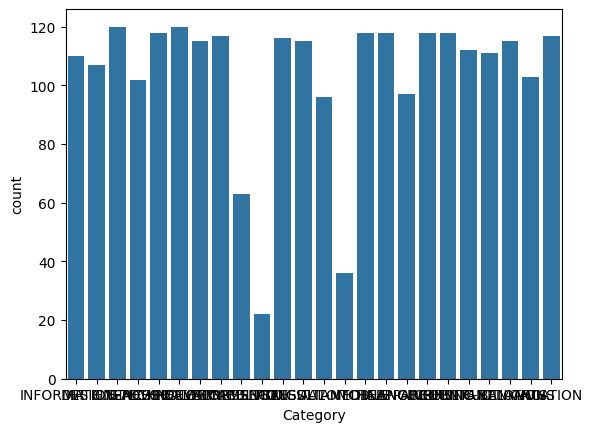

In [55]:
# Plot the counts of flagged vs not flagged
sns.countplot(x='Category', data=resume_df)


In [57]:
category = 'INFORMATION-TECHNOLOGY'  # Replace with the desired category
filtered_text = ' '.join(resume_df[resume_df['Category'] == category]['cleaned'])

wordcloud = WordCloud(width=1200, height=800, background_color='black', colormap='plasma').generate(filtered_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {category}', fontsize=20)
plt.show()

# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

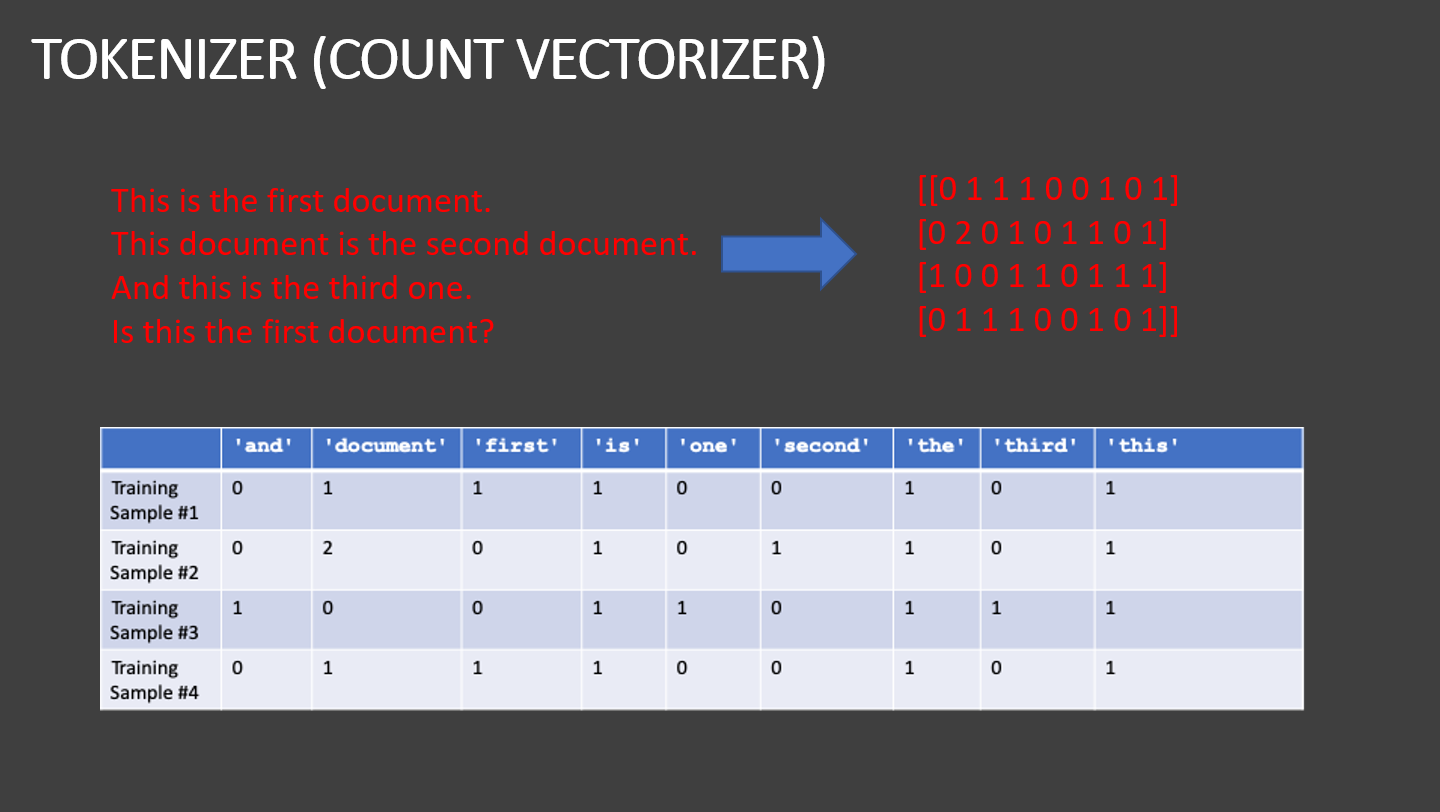

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(resume_df['cleaned'])
y = resume_df['Category']

In [65]:
print(vectorizer.get_feature_names_out())

['abilities' 'ability' 'able' ... 'young' 'youth' 'zero']


In [67]:
print(X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.02723439 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02377526 0.         ... 0.         0.08901877 0.        ]
 [0.03495616 0.02201921 0.02987842 ... 0.         0.         0.        ]]


In [171]:

# Ensure the series is properly formatted
vectorizer = CountVectorizer()
cv = vectorizer.fit_transform(resume_df['cleaned'].astype(str).tolist())
cv

<125x11315 sparse matrix of type '<class 'numpy.int64'>'
	with 35737 stored elements in Compressed Sparse Row format>

# TASK#9: TRAIN Random Forest MODEL

In [70]:

X

<2484x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 601721 stored elements in Compressed Sparse Row format>

In [203]:
y=resume_df['class']
from sklearn.preprocessing import LabelEncoder

# Encode string labels into integers
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [72]:
X.shape

(2484, 3000)

In [74]:
y.shape

(2484,)

In [76]:
y

0             HR
1             HR
2             HR
3             HR
4             HR
          ...   
2479    AVIATION
2480    AVIATION
2481    AVIATION
2482    AVIATION
2483    AVIATION
Name: Category, Length: 2484, dtype: object

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [86]:
X_train.shape

(1987, 3000)

In [88]:
X_test.shape

(497, 3000)

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


In [94]:
# Predicting the performance on train data
y_pred = rf_model.predict(X_test)
y_pred
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

<Axes: >

<Axes: >

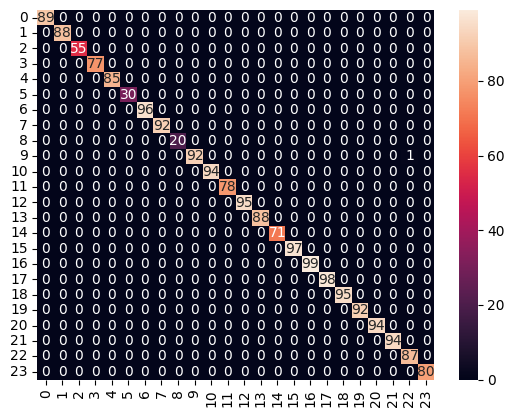

In [114]:
# Predicting the performance on train data
y_pred_train = rf_model.predict(X_train)
y_pred_train
cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot = True)

In [118]:
# classification report
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.82      0.93      0.87        29
              ADVOCATE       0.93      0.87      0.90        30
           AGRICULTURE       0.50      0.12      0.20         8
               APPAREL       0.71      0.50      0.59        20
                  ARTS       0.29      0.11      0.16        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.76      0.90      0.83        21
               BANKING       0.71      0.65      0.68        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.82      0.52      0.64        27
                  CHEF       0.86      0.79      0.83        24
          CONSTRUCTION       0.91      0.85      0.88        34
            CONSULTANT       0.77      0.50      0.61        20
              DESIGNER       0.77      0.89      0.83        19
         DIGITAL-MEDIA       0.86      

C:\Users\Yatharth Kohli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yatharth Kohli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yatharth Kohli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [112]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
import json

# Extract keywords for each category
def extract_keywords_by_category(resume_df, top_n=20):
    category_keywords = {}

    for category in resume_df['Category'].unique():
        #  Filter resumes by category
        category_resumes = resume_df[resume_df['Category'] == category]['Resume_str']

        #  TF-IDF Vectorizer
        vectorizer = TfidfVectorizer(max_features=top_n, stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(category_resumes)

        #  Extract top keywords
        keywords = vectorizer.get_feature_names_out()
        category_keywords[category] = list(keywords)

    return category_keywords


In [142]:
keywords_dict = extract_keywords_by_category(resume_df, top_n=20)
keywords_dict

{'HR': ['benefits',
  'business',
  'city',
  'company',
  'development',
  'employee',
  'employees',
  'hr',
  'human',
  'management',
  'new',
  'payroll',
  'performance',
  'policies',
  'process',
  'recruitment',
  'resources',
  'skills',
  'state',
  'training'],
 'DESIGNER': ['city',
  'company',
  'customer',
  'design',
  'designer',
  'development',
  'experience',
  'graphic',
  'management',
  'marketing',
  'new',
  'product',
  'project',
  'projects',
  'sales',
  'skills',
  'state',
  'team',
  'training',
  'work'],
 'INFORMATION-TECHNOLOGY': ['business',
  'city',
  'company',
  'data',
  'development',
  'information',
  'management',
  'microsoft',
  'network',
  'new',
  'project',
  'security',
  'server',
  'software',
  'state',
  'support',
  'systems',
  'technical',
  'technology',
  'windows'],
 'TEACHER': ['activities',
  'children',
  'city',
  'classroom',
  'company',
  'development',
  'education',
  'experience',
  'learning',
  'management',
  'p

In [146]:

#  Generate and save the keywords
keywords_dict = extract_keywords_by_category(resume_df, top_n=20)

#  Save as JSON for later use
with open('category_keywords.json', 'w') as f:
    json.dump(keywords_dict, f, indent=4)

print("Keywords for each category saved successfully!")


Keywords for each category saved successfully!


In [150]:


# Load the auto-generated keywords
with open('category_keywords.json', 'r') as f:
    category_keywords = json.load(f)



In [152]:

#  Scoring function using auto-generated keywords
def keyword_frequency_score(resume_text, category):
    resume_text = resume_text.lower()
    
    # Use auto-generated keywords
    keywords = category_keywords.get(category, [])
    
    frequency = sum(resume_text.count(keyword) for keyword in keywords)
    
    # Normalize score (max 100 points)
    score = min(frequency, 10) * 10  
    return round(score, 2)